In [ ]:
import pandas as pd
import numpy as np
 
data=pd.read_csv('/content/metadata.csv')
data_extracted_initial=data[['finding','clinical_notes']]
nrow=data_extracted_initial.shape[0]


ncol=data_extracted_initial.shape[1]
print(nrow,ncol)
 
#Check if the rows with null values have to be removed
data_extracted_initial=data_extracted_initial.dropna()
nrow=data_extracted_initial.shape[0]
ncol=data_extracted_initial.shape[1]
print(nrow,ncol)

950 2
768 2


In [ ]:
data_extracted_initial['finding'] = data_extracted_initial['finding'].str.replace("Pneumonia/Viral/COVID-19","COVID-19")
data_extracted_initial['finding'] = data_extracted_initial['finding'].str.replace("Pneumonia/Viral/SARS","SARS")
data_extracted_initial['finding'] = data_extracted_initial['finding'].str.replace("^Pneumonia$","ARDS",regex=True)


In [ ]:
virus = ['COVID-19','SARS','ARDS']
data_extracted = data_extracted_initial[data_extracted_initial.finding.str.contains('|'.join(virus))]

nrow=data_extracted.shape[0]
ncol=data_extracted.shape[1]
print(nrow,ncol)
data_extracted.finding.value_counts()

584 2


COVID-19    487
ARDS         81
SARS         16
Name: finding, dtype: int64

In [ ]:
data_extracted["report_length"]= data_extracted["clinical_notes"].str.len()
data_extracted.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,finding,clinical_notes,report_length
0,COVID-19,"On January 22, 2020, a 65-year-old man with a ...",699
1,COVID-19,"On January 22, 2020, a 65-year-old man with a ...",917
2,COVID-19,"On January 22, 2020, a 65-year-old man with a ...",917
3,COVID-19,"On January 22, 2020, a 65-year-old man with a ...",644
4,COVID-19,diffuse infiltrates in the bilateral lower lungs,48
5,COVID-19,progressive diffuse interstitial opacities and...,115
6,ARDS,Severe ARDS. Person is intubated with an OG in...,53
7,COVID-19,Case 2: chest x-ray obtained on Jan 6 (2A). Th...,563
8,COVID-19,Case 2: chest x-ray obtained on Jan 6 (2A). Th...,563
9,SARS,SARS in a 74-year-old man who developed sympto...,186


[(0.0, 1400.0)]

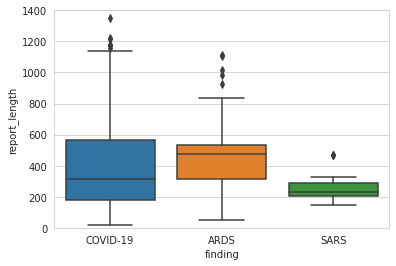

In [ ]:
import seaborn as sns 
sns.set_style("whitegrid")
ax=sns.boxplot(x = data_extracted['finding'], y = data_extracted['report_length'])
ax.set(ylim=(0, 1400))

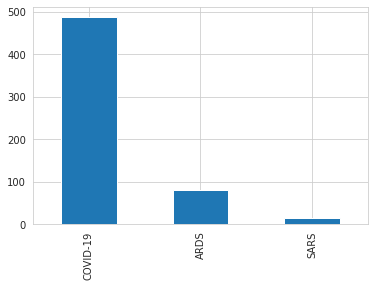

In [ ]:
data_extracted['finding'].value_counts().plot(kind='bar')

In [ ]:
#Remove punctuation and convert everything to lower case
data_extracted['punctuation']=data_extracted['clinical_notes'].str.lower()
data_extracted['punctuation']=data_extracted['punctuation'].str.replace('[^\w\s]','')
data_extracted.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,finding,clinical_notes,report_length,punctuation
0,COVID-19,"On January 22, 2020, a 65-year-old man with a ...",699,on january 22 2020 a 65yearold man with a hist...
1,COVID-19,"On January 22, 2020, a 65-year-old man with a ...",917,on january 22 2020 a 65yearold man with a hist...
2,COVID-19,"On January 22, 2020, a 65-year-old man with a ...",917,on january 22 2020 a 65yearold man with a hist...
3,COVID-19,"On January 22, 2020, a 65-year-old man with a ...",644,on january 22 2020 a 65yearold man with a hist...
4,COVID-19,diffuse infiltrates in the bilateral lower lungs,48,diffuse infiltrates in the bilateral lower lungs
5,COVID-19,progressive diffuse interstitial opacities and...,115,progressive diffuse interstitial opacities and...
6,ARDS,Severe ARDS. Person is intubated with an OG in...,53,severe ards person is intubated with an og in ...
7,COVID-19,Case 2: chest x-ray obtained on Jan 6 (2A). Th...,563,case 2 chest xray obtained on jan 6 2a the bri...
8,COVID-19,Case 2: chest x-ray obtained on Jan 6 (2A). Th...,563,case 2 chest xray obtained on jan 6 2a the bri...
9,SARS,SARS in a 74-year-old man who developed sympto...,186,sars in a 74yearold man who developed symptoms...


In [ ]:
#Lemmatisation (lemmatisation is not working properly)
import nltk
nltk.download('wordnet')
nltk.download('punkt')     #for word_tokenize function
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text): 
  word_list=nltk.word_tokenize(text)
  txt=' '.join([lemmatizer.lemmatize(w,pos='v') for w in word_list])  #noun is not working 
  #s=[lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)] 
  #txt=' '.join(s)
  return txt

data_extracted['lemmatisation'] = data_extracted.punctuation.apply(lemmatize_text)
data_extracted.head(10)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,finding,clinical_notes,report_length,punctuation,lemmatisation
0,COVID-19,"On January 22, 2020, a 65-year-old man with a ...",699,on january 22 2020 a 65yearold man with a hist...,on january 22 2020 a 65yearold man with a hist...
1,COVID-19,"On January 22, 2020, a 65-year-old man with a ...",917,on january 22 2020 a 65yearold man with a hist...,on january 22 2020 a 65yearold man with a hist...
2,COVID-19,"On January 22, 2020, a 65-year-old man with a ...",917,on january 22 2020 a 65yearold man with a hist...,on january 22 2020 a 65yearold man with a hist...
3,COVID-19,"On January 22, 2020, a 65-year-old man with a ...",644,on january 22 2020 a 65yearold man with a hist...,on january 22 2020 a 65yearold man with a hist...
4,COVID-19,diffuse infiltrates in the bilateral lower lungs,48,diffuse infiltrates in the bilateral lower lungs,diffuse infiltrate in the bilateral lower lungs
5,COVID-19,progressive diffuse interstitial opacities and...,115,progressive diffuse interstitial opacities and...,progressive diffuse interstitial opacities and...
6,ARDS,Severe ARDS. Person is intubated with an OG in...,53,severe ards person is intubated with an og in ...,severe ards person be intubate with an og in p...
7,COVID-19,Case 2: chest x-ray obtained on Jan 6 (2A). Th...,563,case 2 chest xray obtained on jan 6 2a the bri...,case 2 chest xray obtain on jan 6 2a the brigh...
8,COVID-19,Case 2: chest x-ray obtained on Jan 6 (2A). Th...,563,case 2 chest xray obtained on jan 6 2a the bri...,case 2 chest xray obtain on jan 6 2a the brigh...
9,SARS,SARS in a 74-year-old man who developed sympto...,186,sars in a 74yearold man who developed symptoms...,sars in a 74yearold man who develop symptoms 4...


In [ ]:
#Stopword removal
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

def stop_removal(text):
  t=[x for x in text.split() if x not in stop]
  s=' '.join(t)
  return s

data_extracted['stopwords']=data_extracted.lemmatisation.apply(stop_removal)
data_extracted.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,finding,clinical_notes,report_length,punctuation,lemmatisation,stopwords
0,COVID-19,"On January 22, 2020, a 65-year-old man with a ...",699,on january 22 2020 a 65yearold man with a hist...,on january 22 2020 a 65yearold man with a hist...,january 22 2020 65yearold man history hyperten...
1,COVID-19,"On January 22, 2020, a 65-year-old man with a ...",917,on january 22 2020 a 65yearold man with a hist...,on january 22 2020 a 65yearold man with a hist...,january 22 2020 65yearold man history hyperten...
2,COVID-19,"On January 22, 2020, a 65-year-old man with a ...",917,on january 22 2020 a 65yearold man with a hist...,on january 22 2020 a 65yearold man with a hist...,january 22 2020 65yearold man history hyperten...
3,COVID-19,"On January 22, 2020, a 65-year-old man with a ...",644,on january 22 2020 a 65yearold man with a hist...,on january 22 2020 a 65yearold man with a hist...,january 22 2020 65yearold man history hyperten...
4,COVID-19,diffuse infiltrates in the bilateral lower lungs,48,diffuse infiltrates in the bilateral lower lungs,diffuse infiltrate in the bilateral lower lungs,diffuse infiltrate bilateral lower lungs
5,COVID-19,progressive diffuse interstitial opacities and...,115,progressive diffuse interstitial opacities and...,progressive diffuse interstitial opacities and...,progressive diffuse interstitial opacities con...
6,ARDS,Severe ARDS. Person is intubated with an OG in...,53,severe ards person is intubated with an og in ...,severe ards person be intubate with an og in p...,severe ards person intubate og place
7,COVID-19,Case 2: chest x-ray obtained on Jan 6 (2A). Th...,563,case 2 chest xray obtained on jan 6 2a the bri...,case 2 chest xray obtain on jan 6 2a the brigh...,case 2 chest xray obtain jan 6 2a brightness l...
8,COVID-19,Case 2: chest x-ray obtained on Jan 6 (2A). Th...,563,case 2 chest xray obtained on jan 6 2a the bri...,case 2 chest xray obtain on jan 6 2a the brigh...,case 2 chest xray obtain jan 6 2a brightness l...
9,SARS,SARS in a 74-year-old man who developed sympto...,186,sars in a 74yearold man who developed symptoms...,sars in a 74yearold man who develop symptoms 4...,sars 74yearold man develop symptoms 4 days exp...


In [ ]:
#Construct TFIDF matrix
from sklearn.feature_extraction.text import TfidfVectorizer
#both unigrams and bigrams are extracted. Change ngram_range=(1,1) only for unigrams
tfidf = TfidfVectorizer(stop_words='english',ngram_range=(1,2))
data_extracted['number_removed']=data_extracted['stopwords'].str.replace('\d+', '')
tfidf_matrix = tfidf.fit_transform(data_extracted['number_removed'])
print('Shape of tfidf matrix: ',tfidf_matrix.shape)
print('Feature names: ',tfidf.get_feature_names()[400:410])

feature_names = tfidf.get_feature_names()
corpus_index = [n for n in range(1,tfidf_matrix.shape[0]+1)]
values=tfidf_matrix.T.todense()
transpose_values=np.array(values).transpose()
tfidf_matrix_display = pd.DataFrame(transpose_values, index=corpus_index, columns=feature_names)
print(tfidf_matrix_display[['chest', 'patient', 'multiple', 'peripheral','bilateral','lower','lung','image','lob','ct','right','lobe','air','pneumonia','history']])

Shape of tfidf matrix:  (584, 12935)
Feature names:  ['allow', 'allow cpap', 'alongside', 'alongside scatter', 'alpha', 'alpha level', 'alpha measure', 'alphab', 'alphab aerosol', 'alter']
        chest   patient  multiple  ...       air  pneumonia   history
1    0.030577  0.000000       0.0  ...  0.000000   0.000000  0.042129
2    0.026471  0.000000       0.0  ...  0.047673   0.000000  0.036472
3    0.026471  0.000000       0.0  ...  0.047673   0.000000  0.036472
4    0.000000  0.000000       0.0  ...  0.000000   0.000000  0.043610
5    0.000000  0.000000       0.0  ...  0.000000   0.000000  0.000000
..        ...       ...       ...  ...       ...        ...       ...
580  0.000000  0.000000       0.0  ...  0.000000   0.000000  0.000000
581  0.000000  0.000000       0.0  ...  0.000000   0.000000  0.000000
582  0.034917  0.000000       0.0  ...  0.000000   0.000000  0.000000
583  0.091897  0.049302       0.0  ...  0.000000   0.035382  0.031654
584  0.091634  0.049161       0.0  ...  0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
#Word collection and their frequencies

wordfreq = {}
for sentence in data_extracted['number_removed']:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1
print('Bag of words and their frequencies:',wordfreq)

#Gets the 200 most frequent words with their frequency of occurrence
import heapq
most_freq = heapq.nlargest(200, wordfreq, key=wordfreq.get)

#Bag of word model as a 2D matrix
sentence_vectors = []
for sentence in data_extracted['number_removed']:
    sentence_tokens = nltk.word_tokenize(sentence)
    sent_vec = []
    for token in most_freq:
        if token in sentence_tokens:
            sent_vec.append(1)
        else:
            sent_vec.append(0)
    sentence_vectors.append(sent_vec)
sentence_vectors = np.asarray(sentence_vectors)
bow_model = pd.DataFrame(sentence_vectors, columns=most_freq)
bow_model.head(10)

Bag of words and their frequencies: {'january': 92, 'yearold': 152, 'man': 54, 'history': 173, 'hypertension': 39, 'type': 15, 'diabetes': 16, 'coronary': 11, 'heart': 65, 'disease': 71, 'stent': 4, 'implant': 4, 'lung': 231, 'cancer': 10, 'admit': 60, 'emergency': 51, 'department': 48, 'cho': 4, 'ray': 9, 'hospital': 103, 'referral': 4, 'ho': 4, 'chi': 4, 'minh': 4, 'city': 6, 'lowgrade': 12, 'fever': 293, 'fatigue': 23, 'become': 18, 'ill': 9, 'total': 7, 'days': 204, 'wife': 5, 'fly': 4, 'hanoi': 4, 'wuchang': 4, 'district': 4, 'wuhan': 28, 'outbreaks': 5, 'ncov': 5, 'occur': 9, 'report': 58, 'expose': 4, 'wet': 6, 'market': 11, 'dead': 4, 'live': 13, 'animals': 4, 'sell': 4, 'chest': 402, 'radiographs': 25, 'obtain': 48, 'admission': 128, 'show': 276, 'infiltrate': 46, 'upper': 113, 'lobe': 158, 'leave': 211, 'receive': 18, 'supplemental': 10, 'oxygen': 106, 'nasal': 12, 'cannula': 6, 'rate': 37, 'liters': 4, 'per': 31, 'minute': 12, 'increase': 113, 'dyspnea': 64, 'hypoxemia': 14,

,patient,chest,fever,show,bilateral,right,lung,cough,day,lower,leave,consolidation,days,opacities,covid,normal,present,history,xray,lobe,ct,yearold,c,image,pneumonia,admission,radiograph,peripheral,respiratory,positive,upper,increase,test,oxygen,symptoms,hospital,groundglass,patchy,january,blood,...,po,first,side,sign,new,space,axial,reaction,per,multifocal,contact,prior,arrows,severe,shadow,develop,week,spo,result,pressure,initial,perihilar,recent,hours,one,february,chain,view,th,wuhan,china,sore,pattern,years,mechanical,past,mgdl,progressive,confirm,followup
0,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#feature_names has list of all the words in the tf-idf vocabulary
def top_tfidf_feats(row, feature_names, top_n=40):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    '''argsort returns the indices that would sort the row by its tf-idf value and reverse them (into descending order) to select the first top_n.'''
    '''A pandas DataFrame is returned with the words themselves (feature names) and their corresponding score.'''
    topn_ids = np.argsort(row)[::-1][:top_n] 
    top_feats = [(feature_names[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [ ]:
#Extracting the 100 most relevant features from tfidf matrix
tfidf = TfidfVectorizer(max_features=100,stop_words='english',ngram_range=(1,2))
data_extracted['number_removed']=data_extracted['stopwords'].str.replace('\d+', '')
tfidf_matrix = tfidf.fit_transform(data_extracted['number_removed'])
print('Shape of tfidf matrix: ',tfidf_matrix.shape)
print('Feature names: ',tfidf.get_feature_names())
feature_names = tfidf.get_feature_names()
corpus_index = [n for n in range(1,tfidf_matrix.shape[0]+1)]
values=tfidf_matrix.T.todense()
transpose_values=np.array(values).transpose()
tfidf_matrix_display = pd.DataFrame(transpose_values, index=corpus_index, columns=feature_names)
print(tfidf_matrix_display)

Shape of tfidf matrix:  (584, 100)
Feature names:  ['admission', 'admit', 'air', 'airspace', 'areas', 'associate', 'bilateral', 'blood', 'breath', 'case', 'chest', 'chest radiograph', 'chest xray', 'clinical', 'consolidation', 'consolidations', 'cough', 'covid', 'creactive', 'creactive protein', 'ct', 'day', 'days', 'demonstrate', 'diffuse', 'disease', 'dry', 'dry cough', 'dyspnea', 'effusion', 'elevate', 'emergency', 'fever', 'field', 'fig', 'groundglass', 'groundglass opacities', 'heart', 'history', 'hospital', 'image', 'increase', 'interstitial', 'january', 'laboratory', 'later', 'leave', 'leave lower', 'lob', 'lobe', 'lower', 'lower lobe', 'lung', 'lungs', 'male', 'man', 'medical', 'multiple', 'normal', 'normal range', 'note', 'old', 'opacities', 'opacity', 'oxygen', 'parenchymal', 'patchy', 'patient', 'pcr', 'perform', 'peripheral', 'pleural', 'pleural effusion', 'pneumonia', 'positive', 'present', 'presentation', 'protein', 'pulmonary', 'radiograph', 'range', 'report', 'respirato

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
X = tfidf_matrix.toarray()
y = data_extracted['finding']

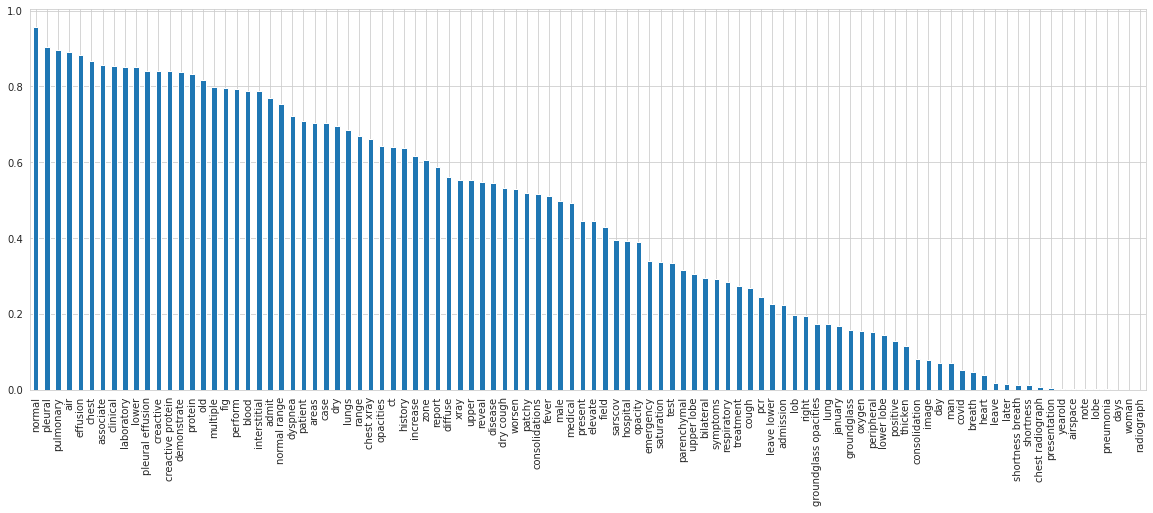

In [ ]:
#chi scores for features
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2, f_classif
chi_scores = chi2(X,y)
p_values = pd.Series(chi_scores[1],tfidf.get_feature_names())
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar(figsize=(20, 7))

In [ ]:
#Chi square test for feature selection
test = SelectKBest(score_func=chi2, k=50)
fit = test.fit(X, y)
X_new=test.fit_transform(X, y)
fit.scores_

array([ 3.00903424,  0.52168862,  0.23142465, 13.54610406,  0.70031645,
        0.31136558,  2.45299131,  0.4744574 ,  6.15950531,  0.70343436,
        0.28394214,  9.67488731,  0.82327806,  0.31764241,  5.05775375,
        1.32657491,  2.64257343,  5.96200526,  0.34922085,  0.34922085,
        0.89113045,  5.28780964, 19.80396012,  0.35261272,  1.15654451,
        1.21653033,  0.72453003,  1.26154851,  0.65132146,  0.25143997,
        1.6234104 ,  2.16533599,  1.3420368 ,  1.68907851,  0.45775617,
        3.70143291,  3.51397764,  6.56956577,  0.90380448,  1.87085233,
        5.08293825,  0.96539723,  0.47671587,  3.58338634,  0.31934997,
        8.32683169,  8.00027359,  2.97829759,  3.25729584, 15.54399215,
        0.31935841,  3.8598245 ,  3.52186045,  0.75803731,  1.39535695,
        5.31352971,  1.41242189,  0.45051429,  0.08883733,  0.56341373,
       15.0093119 ,  0.40622286,  0.87984551,  1.8840332 ,  3.73511746,
        2.31251918,  1.31258098,  0.68886153,  2.82926096,  0.46

In [ ]:
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

X = X_new
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#Multinomial Naive Bayes
#Model and metrics evaluation
print('-------------------------Multinomial Naive Bayes-------------------------')
NaiveBayes = MultinomialNB()
NaiveBayes.fit(X_train,y_train)
y_predict = NaiveBayes.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,y_predict))
print('Confusion matrix: \n ',confusion_matrix(y_test, y_predict))
print('Classification report: ',classification_report(y_test,y_predict))

#Using Cross validation (CV) and evaluating accuracy after CV
#10 fold cross validation repreated twice
rkf = RepeatedKFold(n_splits=10, n_repeats=2, random_state=1)
scores = cross_val_score(NaiveBayes, X_train, y_train, scoring='accuracy', cv=rkf, n_jobs=-1)
# report performance
print("%0.4f accuracy with a standard deviation of %0.2f for Multinomial Naive Bayes after 10 fold Cross Validation" % (scores.mean(), scores.std()))

#GridSearch and evaluating accuracy after performing gridsearch
parameters = {  
'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)  
}
grid_search = GridSearchCV(estimator = NaiveBayes, param_grid = parameters,scoring = 'accuracy', cv = rkf)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('*******************BEFORE TUNING:************************')
print('Accuracy:',accuracy_score(y_test,y_predict)*100)
print('Precision:', precision_score(y_test,y_predict,average='weighted')*100)
print('Recall:', recall_score(y_test,y_predict,average='weighted')*100)
print('F1 score:', f1_score(y_test,y_predict,average='weighted')*100)

print()
print('*******************AFTER TUNING:************************')
weighted_prediction=grid_search.predict(X_test)
print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))
print('Precision:', precision_score(y_test, weighted_prediction,average='weighted')*100)
print('Recall:', recall_score(y_test, weighted_prediction,average='weighted')*100)
print('F1 score:', f1_score(y_test, weighted_prediction,average='weighted')*100)

-------------------------Multinomial Naive Bayes-------------------------
Accuracy:  0.811965811965812
Confusion matrix: 
  [[ 3 16  0]
 [ 0 92  0]
 [ 0  6  0]]
Classification report:                precision    recall  f1-score   support

        ARDS       1.00      0.16      0.27        19
    COVID-19       0.81      1.00      0.89        92
        SARS       0.00      0.00      0.00         6

    accuracy                           0.81       117
   macro avg       0.60      0.39      0.39       117
weighted avg       0.80      0.81      0.75       117



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8543 accuracy with a standard deviation of 0.04 for Multinomial Naive Bayes after 10 fold Cross Validation
*******************BEFORE TUNING:************************
Accuracy: 81.19658119658119
Precision: 79.69710601289547
Recall: 81.19658119658119
F1 score: 74.6637397122834

*******************AFTER TUNING:************************
Best Parameters after tuning: {'alpha': 0.001}
Best Accuracy after tuning: 0.8756706753006476
Precision: 81.41218141218141
Recall: 83.76068376068376
F1 score: 79.06766030903962


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Logistic Regression
#Model and metrics evaluation
from sklearn.linear_model import LogisticRegression
print('-------------------------Logistic Regression-------------------------')
logres = LogisticRegression(random_state = 0)
logres.fit(X_train,y_train)
y_predict = logres.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,y_predict))
print('Confusion matrix: \n ',confusion_matrix(y_test, y_predict))
print('Classification report: ',classification_report(y_test,y_predict))

#Using Cross validation (CV) and evaluating accuracy after CV
#10 fold cross validation repreated twice
rkf = RepeatedKFold(n_splits=10, n_repeats=2, random_state=1)
scores = cross_val_score(logres, X_train, y_train, scoring='accuracy', cv=rkf, n_jobs=-1)
# report performance
print("%0.2f accuracy with a standard deviation of %0.2f for Logistic Regression after 10 fold Cross Validation" % (scores.mean(), scores.std()))

#GridSearch and evaluating accuracy after performing gridsearch
parameters = {"solver":['newton-cg', 'lbfgs', 'liblinear'],"C":[100, 10, 1.0, 0.1, 0.01], "penalty":["l2"]}
grid_search = GridSearchCV(estimator = logres, param_grid = parameters,scoring = 'accuracy', cv = rkf)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('*******************BEFORE TUNING:************************')
print('Accuracy:',accuracy_score(y_test,y_predict)*100)
print('Precision:', precision_score(y_test,y_predict,average='weighted')*100)
print('Recall:', recall_score(y_test,y_predict,average='weighted')*100)
print('F1 score:', f1_score(y_test,y_predict,average='weighted')*100)

print()
print('*******************AFTER TUNING:************************')
weighted_prediction=grid_search.predict(X_test)
print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))
print('Precision:', precision_score(y_test, weighted_prediction,average='weighted')*100)
print('Recall:', recall_score(y_test, weighted_prediction,average='weighted')*100)
print('F1 score:', f1_score(y_test, weighted_prediction,average='weighted')*100)

-------------------------Logistic Regression-------------------------
Accuracy:  0.8803418803418803
Confusion matrix: 
  [[11  8  0]
 [ 0 92  0]
 [ 0  6  0]]
Classification report:                precision    recall  f1-score   support

        ARDS       1.00      0.58      0.73        19
    COVID-19       0.87      1.00      0.93        92
        SARS       0.00      0.00      0.00         6

    accuracy                           0.88       117
   macro avg       0.62      0.53      0.55       117
weighted avg       0.84      0.88      0.85       117



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.90 accuracy with a standard deviation of 0.04 for Logistic Regression after 10 fold Cross Validation


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


*******************BEFORE TUNING:************************
Accuracy: 88.03418803418803
Precision: 84.48637316561846
Recall: 88.03418803418803
F1 score: 84.98143831477165

*******************AFTER TUNING:************************
Best Parameters after tuning: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy after tuning: 0.9582793709528215
Precision: 95.73711312841749
Recall: 94.87179487179486
F1 score: 95.08918241191554


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Support Vector Machines
#Model and metrics evaluation
from sklearn import svm
print('-------------------------Support Vector Machines-------------------------')
classifier = svm.SVC()
classifier.fit(X_train,y_train)
y_predict = classifier.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,y_predict))
print('Confusion matrix: \n ',confusion_matrix(y_test, y_predict))
print('Classification report: ',classification_report(y_test,y_predict))

#Using Cross validation (CV) and evaluating accuracy after CV
#10 fold cross validation repreated twice
rkf = RepeatedKFold(n_splits=10, n_repeats=2, random_state=1)
scores = cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv=rkf, n_jobs=-1)
# report performance
print("%0.2f accuracy with a standard deviation of %0.2f for Support Vector Machines after 10 fold Cross Validation" % (scores.mean(), scores.std()))

#GridSearch and evaluating accuracy after performing gridsearch
parameters = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','poly','sigmoid']} 
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters,scoring = 'accuracy', cv = rkf)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_


print('*******************BEFORE TUNING:************************')
print('Accuracy:',accuracy_score(y_test,y_predict)*100)
print('Precision:', precision_score(y_test,y_predict,average='weighted')*100)
print('Recall:', recall_score(y_test,y_predict,average='weighted')*100)
print('F1 score:', f1_score(y_test,y_predict,average='weighted')*100)

print()
print('*******************AFTER TUNING:************************')
weighted_prediction=grid_search.predict(X_test)
print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))
print('Precision:', precision_score(y_test, weighted_prediction,average='weighted')*100)
print('Recall:', recall_score(y_test, weighted_prediction,average='weighted')*100)
print('F1 score:', f1_score(y_test, weighted_prediction,average='weighted')*100)

-------------------------Support Vector Machines-------------------------
Accuracy:  0.9487179487179487
Confusion matrix: 
  [[17  2  0]
 [ 0 92  0]
 [ 0  4  2]]
Classification report:                precision    recall  f1-score   support

        ARDS       1.00      0.89      0.94        19
    COVID-19       0.94      1.00      0.97        92
        SARS       1.00      0.33      0.50         6

    accuracy                           0.95       117
   macro avg       0.98      0.74      0.80       117
weighted avg       0.95      0.95      0.94       117

0.93 accuracy with a standard deviation of 0.03 for Support Vector Machines after 10 fold Cross Validation
*******************BEFORE TUNING:************************
Accuracy: 94.87179487179486
Precision: 95.18576661433804
Recall: 94.87179487179486
F1 score: 94.05058229619632

*******************AFTER TUNING:************************
Best Parameters after tuning: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best Accuracy after tuning: 0.

In [ ]:
#Decision Tree
#Model and metrics evaluation
from sklearn.tree import DecisionTreeClassifier
print('-------------------------Decision Tree-------------------------')
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_predict = dt.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,y_predict))
print('Confusion matrix: \n ',confusion_matrix(y_test, y_predict))
print('Classification report: ',classification_report(y_test,y_predict))

#Using Cross validation (CV) and evaluating accuracy after CV
#10 fold cross validation repreated twice
rkf = RepeatedKFold(n_splits=10, n_repeats=2, random_state=1)
scores = cross_val_score(dt, X_train, y_train, scoring='accuracy', cv=rkf, n_jobs=-1)
# report performance
print("%0.2f accuracy with a standard deviation of %0.2f for Decision Tree after 10 fold Cross Validation" % (scores.mean(), scores.std()))

#GridSearch and evaluating accuracy after performing gridsearch
parameters = {'criterion': ['gini','entropy'], 
              'max_depth': range(1,10),
              'min_samples_split': range(2,10),
              'min_samples_leaf': range(1,5)} 
grid_search = GridSearchCV(estimator = dt, param_grid = parameters,scoring = 'accuracy', cv = rkf)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('*******************BEFORE TUNING:************************')
print('Accuracy:',accuracy_score(y_test,y_predict)*100)
print('Precision:', precision_score(y_test,y_predict,average='weighted')*100)
print('Recall:', recall_score(y_test,y_predict,average='weighted')*100)
print('F1 score:', f1_score(y_test,y_predict,average='weighted')*100)

print()
print('*******************AFTER TUNING:************************')
weighted_prediction=grid_search.predict(X_test)
print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))
print('Precision:', precision_score(y_test, weighted_prediction,average='weighted')*100)
print('Recall:', recall_score(y_test, weighted_prediction,average='weighted')*100)
print('F1 score:', f1_score(y_test, weighted_prediction,average='weighted')*100)

-------------------------Decision Tree-------------------------
Accuracy:  0.9487179487179487
Confusion matrix: 
  [[15  4  0]
 [ 1 90  1]
 [ 0  0  6]]
Classification report:                precision    recall  f1-score   support

        ARDS       0.94      0.79      0.86        19
    COVID-19       0.96      0.98      0.97        92
        SARS       0.86      1.00      0.92         6

    accuracy                           0.95       117
   macro avg       0.92      0.92      0.92       117
weighted avg       0.95      0.95      0.95       117

0.89 accuracy with a standard deviation of 0.03 for Decision Tree after 10 fold Cross Validation
*******************BEFORE TUNING:************************
Accuracy: 94.87179487179486
Precision: 94.906379081911
Recall: 94.87179487179486
F1 score: 94.74908879375381

*******************AFTER TUNING:************************
Best Parameters after tuning: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}
Bes

In [ ]:
#Bagging
#Model and metrics evaluation
from sklearn.ensemble import BaggingClassifier
print('-------------------------Bagging-------------------------')
bag = BaggingClassifier()
bag.fit(X_train,y_train)
y_predict = bag.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,y_predict))
print('Confusion matrix: \n ',confusion_matrix(y_test, y_predict))
print('Classification report: ',classification_report(y_test,y_predict))

#Using Cross validation (CV) and evaluating accuracy after CV
#10 fold cross validation repreated twice
rkf = RepeatedKFold(n_splits=10, n_repeats=2, random_state=1)
scores = cross_val_score(bag, X_train, y_train, scoring='accuracy', cv=rkf, n_jobs=-1)
# report performance
print("%0.2f accuracy with a standard deviation of %0.2f for Bagging after 10 fold Cross Validation" % (scores.mean(), scores.std()))

#GridSearch and evaluating accuracy after performing gridsearch
parameters = {
    'max_samples' : [0.05, 0.1, 0.2, 0.5],
    'n_estimators': [10, 100, 1000]} 
grid_search = GridSearchCV(estimator = bag, param_grid = parameters,scoring = 'accuracy', cv = rkf)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('*******************BEFORE TUNING:************************')
print('Accuracy:',accuracy_score(y_test,y_predict)*100)
print('Precision:', precision_score(y_test,y_predict,average='weighted')*100)
print('Recall:', recall_score(y_test,y_predict,average='weighted')*100)
print('F1 score:', f1_score(y_test,y_predict,average='weighted')*100)

print()
print('*******************AFTER TUNING:************************')
weighted_prediction=grid_search.predict(X_test)
print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))
print('Precision:', precision_score(y_test, weighted_prediction,average='weighted')*100)
print('Recall:', recall_score(y_test, weighted_prediction,average='weighted')*100)
print('F1 score:', f1_score(y_test, weighted_prediction,average='weighted')*100)

-------------------------Bagging-------------------------
Accuracy:  0.9316239316239316
Confusion matrix: 
  [[17  1  1]
 [ 2 90  0]
 [ 0  4  2]]
Classification report:                precision    recall  f1-score   support

        ARDS       0.89      0.89      0.89        19
    COVID-19       0.95      0.98      0.96        92
        SARS       0.67      0.33      0.44         6

    accuracy                           0.93       117
   macro avg       0.84      0.74      0.77       117
weighted avg       0.92      0.93      0.92       117

0.89 accuracy with a standard deviation of 0.04 for Bagging after 10 fold Cross Validation
*******************BEFORE TUNING:************************
Accuracy: 93.16239316239316
Precision: 92.44264507422402
Recall: 93.16239316239316
F1 score: 92.49813367460428

*******************AFTER TUNING:************************
Best Parameters after tuning: {'max_samples': 0.5, 'n_estimators': 1000}
Best Accuracy after tuning: 0.90127197039778
Precision: 88

In [ ]:

#Random forest classifier
#Model and metrics evaluation
from sklearn.ensemble import RandomForestClassifier
print('-------------------------Random Forest-------------------------')
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_predict = rf.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,y_predict))
print('Confusion matrix: \n ',confusion_matrix(y_test, y_predict))
print('Classification report: ',classification_report(y_test,y_predict))

#Using Cross validation (CV) and evaluating accuracy after CV
#10 fold cross validation repreated twice
rkf = RepeatedKFold(n_splits=10, n_repeats=2, random_state=1)
scores = cross_val_score(rf, X_train, y_train, scoring='accuracy', cv=rkf, n_jobs=-1)
# report performance
print("%0.2f accuracy with a standard deviation of %0.2f for Random forest classifier after 10 fold Cross Validation" % (scores.mean(), scores.std()))

#GridSearch and evaluating accuracy after performing gridsearch
parameters = {
    'n_estimators': [10, 100, 1000],
               'max_features': ['auto', 'sqrt'],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]} 
grid_search = GridSearchCV(estimator = rf, param_grid = parameters,scoring = 'accuracy', cv = rkf)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_


print('*******************BEFORE TUNING:************************')
print('Accuracy:',accuracy_score(y_test,y_predict)*100)
print('Precision:', precision_score(y_test,y_predict,average='weighted')*100)
print('Recall:', recall_score(y_test,y_predict,average='weighted')*100)
print('F1 score:', f1_score(y_test,y_predict,average='weighted')*100)

print()
print('*******************AFTER TUNING:************************')
weighted_prediction=grid_search.predict(X_test)
print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))
print('Precision:', precision_score(y_test, weighted_prediction,average='weighted')*100)
print('Recall:', recall_score(y_test, weighted_prediction,average='weighted')*100)
print('F1 score:', f1_score(y_test, weighted_prediction,average='weighted')*100)

-------------------------Random Forest-------------------------
Accuracy:  0.9316239316239316
Confusion matrix: 
  [[15  3  1]
 [ 0 92  0]
 [ 1  3  2]]
Classification report:                precision    recall  f1-score   support

        ARDS       0.94      0.79      0.86        19
    COVID-19       0.94      1.00      0.97        92
        SARS       0.67      0.33      0.44         6

    accuracy                           0.93       117
   macro avg       0.85      0.71      0.76       117
weighted avg       0.92      0.93      0.92       117

0.92 accuracy with a standard deviation of 0.04 for Random forest classifier after 10 fold Cross Validation
*******************BEFORE TUNING:************************
Accuracy: 93.16239316239316
Precision: 92.46140763997907
Recall: 93.16239316239316
F1 score: 92.3479639269113

*******************AFTER TUNING:************************
Best Parameters after tuning: {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_sample

In [ ]:
#Gradient Boosting
#Model and metrics evaluation
from sklearn.ensemble import GradientBoostingClassifier
print('-------------------------Gradient Boosting-------------------------')
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train,y_train)
y_predict = gb_clf.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,y_predict))
print('Confusion matrix: \n ',confusion_matrix(y_test, y_predict))
print('Classification report: ',classification_report(y_test,y_predict))

#Using Cross validation (CV) and evaluating accuracy after CV
#10 fold cross validation repreated twice
rkf = RepeatedKFold(n_splits=10, n_repeats=2, random_state=1)
scores = cross_val_score(gb_clf, X_train, y_train, scoring='accuracy', cv=rkf, n_jobs=-1)
# report performance
print("%0.2f accuracy with a standard deviation of %0.2f for Gradient Boosting after 10 fold Cross Validation" % (scores.mean(), scores.std()))

#GridSearch and evaluating accuracy after performing gridsearch
parameters = {
    'n_estimators': [10, 100, 1000],
               'max_features': ['auto', 'sqrt'],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
              'learning_rate': [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]} 
grid_search = GridSearchCV(estimator = gb_clf, param_grid = parameters,scoring = 'accuracy', cv = rkf)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_


print('*******************BEFORE TUNING:************************')
print('Accuracy:',accuracy_score(y_test,y_predict)*100)
print('Precision:', precision_score(y_test,y_predict,average='weighted')*100)
print('Recall:', recall_score(y_test,y_predict,average='weighted')*100)
print('F1 score:', f1_score(y_test,y_predict,average='weighted')*100)

print()
print('*******************AFTER TUNING:************************')
weighted_prediction=grid_search.predict(X_test)
print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))
print('Precision:', precision_score(y_test, weighted_prediction,average='weighted')*100)
print('Recall:', recall_score(y_test, weighted_prediction,average='weighted')*100)
print('F1 score:', f1_score(y_test, weighted_prediction,average='weighted')*100)